
# Google Colab
* Google Colab is a web-based iPython Notebook service for interactive coding

* It is a version of the popular
Jupyter Notebook within the Google suite of tools
 * Colab is becoming a popular tool for quick prototyping and visualization

* It’s free, requires no setup, comes preinstalled with many packages

* It offers free access to Nvidia GPUs

* We just need a google account!

 * However, **resource are limited**: notebooks can run for at most 12 hours, depending on availability and your usage patterns

* DeepNote, you have used in the first module, so far does not support GPU computing

* Several online tutorial, see e.g., [https://www.tutorialspoint.com/google_colab/google_colab_tutorial.pdf](https://https://www.tutorialspoint.com/google_colab/google_colab_tutorial.pdf)


# Create a Colab notebook
* The easiest way to create a Colab notebook is to enter in our Google drive, then follow **New-> More -> Google Colaboratory**
 * Alternately, connect to [https://colab.research.google.com](https://colab.research.google.com) **-> New notebook**

* Then to utilize free GPU we have to follow **Runtime-> Change runtime type->GPU**  

* Doing this will restart the session, so make sure you change to the desired runtime before executing any code

* Verifying the GPU is correctly assigned

```
import torch
torch.cuda.is_available()
```

* This outputs **True** if running with GPU

In [1]:
import torch
torch.cuda.is_available()

True

# Sharing a Colab notebook
* As with other Google Apps, Colab Notebooks can be shared
*  Look for the “share” button in the top right-hand corner of the window

* Google Colab documents can also be shared in Google Drive, just you do with other types of documents.

# Mount the personal drive
* One advantage of using Google Colab is that connection with other google services such as **Google Drive** is simple

* By mounting google drive, you can read your drive data and save working files permanently

* To mount the gdrive we need to run the following code, log in to the google account and copy the authentication code to the input box to finish the process

```
from google.colab import drive
drive.mount('/content/gdrive')
```
* Each time we run it then we need to authorize the access in the pop-up window

* You’ll see this when you’ve successfully mounted your drive

``` Mounted at /content/gdrive ```


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


* From now on, you can use the drive like in UNIX terminal, just prepose a **%** or a **!** before the command

* To move to main folder of your drive type
```
%cd gdrive/MyDrive
```

In [3]:
%ls
%pwd

gdrive/  sample_data/


'/content'

In [4]:
%cd gdrive/MyDrive/MLNDNN/Notebooks/Lecture1/

/content/gdrive/MyDrive/MLNDNN/Notebooks/Lecture1


In [5]:
%ls

data/  Lecture1.ipynb  Lesson1_init.ipynb


# Drive Structure
It is possible to see the files in the drive by clicking the botton **files** on the left panel

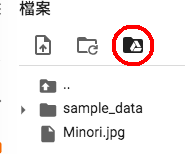


# WARM UP: Implementing the Perceptron
* Let's create the Perceptron class


# Evaluating performance
* ### We will be using the accuracy score
* ### We import it from sklearn.metrics

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import numpy as np

class Perceptron:
    def __init__(self, eta):
        self.w = None
        self.b = None
        self.eta = eta


    # heaviside (step) activation function
    def activation(self, z):
        return np.heaviside(z, 1) # haviside(z), 1 is the value for z=0

    #  training Perceptron
    def fit(self, X, y, epochs, performance_criterion):
        n_features = X.shape[1]
        # Initializing weights and bias
        #self.w = np.zeros((n_features))
        self.w = np.random.rand(n_features)
        self.b = 0
        z  = y_pred = np.zeros(X.shape[0])


        # Iterating until the number of epochs
        for epoch in range(epochs):
            change=0
            for i in range(X.shape[0]):
                y_old = y_pred[i]
                z[i] = np.dot(X[i], self.w) + self.b # Computing the dot product and adding the bias
                y_pred[i] = self.activation(z[i]) # Passing through an activation function
                if y_old != y_pred[i]:
                    change += 1
                #Updating weights and bias using the error
                self.w = self.w + self.eta * (y[i] - y_pred[i]) * X[i]
                self.b = self.b + self.eta * (y[i] - y_pred[i])
            print(f"\t epoch:{epoch}, accuracy:{performance_criterion(y, y_pred)}")
            if not change:
                print(f"No state changes, algorithm converged")
                break



    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return self.activation(z)

    def get_params(self):
      return self.w, self.b


# Now we classify the Iris dataset

In [8]:
from sklearn.datasets import load_iris, load_wine
iris = load_iris()

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.data.shape

(150, 4)

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
#X = iris.data # all columns
X = iris.data[:, (0,1)] # two features
y = (iris.target == 0).astype(int) # we classify setosa against all
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Split data in Train and test set and normalize

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,
                                                    shuffle=True, stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the perceptron on train data

In [15]:
seed = 42
np.random.seed(seed=seed)
model = Perceptron(0.01)
w, b = model.get_params()
print(f"model weights:{w}, model bias:{b}")
model.fit(X_train, y_train, epochs=10,
          performance_criterion=accuracy_score)

w, b = model.get_params()
print(f"model weights:{w}, model bias:{b}")
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

model weights:None, model bias:None
	 epoch:0, accuracy:0.7333333333333333
	 epoch:1, accuracy:0.8666666666666667
	 epoch:2, accuracy:0.9259259259259259
	 epoch:3, accuracy:0.9777777777777777
	 epoch:4, accuracy:0.9851851851851852
	 epoch:5, accuracy:0.9851851851851852
No state changes, algorithm converged
model weights:[-0.43733945  0.51115247], model bias:-0.2700000000000001


# Let's compute the final training and the testing accuracy

In [16]:
# train accuracy
print(f"train accuracy:{accuracy_score(y_train, y_train_predicted)}")
print(f"test accuracy:{accuracy_score(y_test, y_test_predicted)}")

train accuracy:0.9851851851851852
test accuracy:1.0


# **Better way to estimate the generalization error**: Cross-validation



In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
kf = StratifiedKFold(n_splits=5)
acc = []
fold=1
for train_idx, test_idx in kf.split(X, y):
    print(f"fold:{fold}")
    X_train, y_train = X[train_idx,:], y[train_idx]
    np.random.seed(seed=seed)
    model = Perceptron(0.01)
    X_train = scaler.fit_transform(X_train)
    model.fit(X_train, y_train, epochs=10,
              performance_criterion=accuracy_score)
    #print(f"\tmodel.w:{model.w}")
    X_test, y_test = X[test_idx,:], y[test_idx]
    X_test = scaler.transform(X_test)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"test accuracy fold:{accuracy}\n")
    acc.append(accuracy)
    fold+=1

print(f"mean accuracy:{np.mean(acc)}, sdt accuracy:{np.std(acc)}")

fold:1
	 epoch:0, accuracy:0.7333333333333333
	 epoch:1, accuracy:0.85
	 epoch:2, accuracy:0.9083333333333333
	 epoch:3, accuracy:0.9583333333333334
	 epoch:4, accuracy:0.975
	 epoch:5, accuracy:0.9833333333333333
	 epoch:6, accuracy:0.9833333333333333
No state changes, algorithm converged
test accuracy fold:1.0

fold:2
	 epoch:0, accuracy:0.7083333333333334
	 epoch:1, accuracy:0.8416666666666667
	 epoch:2, accuracy:0.9166666666666666
	 epoch:3, accuracy:0.975
	 epoch:4, accuracy:0.975
No state changes, algorithm converged
test accuracy fold:0.9666666666666667

fold:3
	 epoch:0, accuracy:0.7166666666666667
	 epoch:1, accuracy:0.8333333333333334
	 epoch:2, accuracy:0.9333333333333333
	 epoch:3, accuracy:0.9583333333333334
	 epoch:4, accuracy:0.975
	 epoch:5, accuracy:0.9833333333333333
	 epoch:6, accuracy:0.9833333333333333
No state changes, algorithm converged
test accuracy fold:1.0

fold:4
	 epoch:0, accuracy:0.7083333333333334
	 epoch:1, accuracy:0.8583333333333333
	 epoch:2, accurac

# Exercise
* ### Load the wine dataset and train and evaluate a Perceptron in CV setting.
* ### If needed tune the learning rate and the number of epochs
## **Wine dataset: Characteristics:**
* #### Number of Instances: 178 (quite balanced across three classes)
* #### Number of Attributes: 13 numeric
* #### Predict the first class against the other ones

In [24]:
from sklearn.datasets import load_wine
wine = load_wine()
print(f"wine.data.shape:{wine.data.shape}")
print(f"wine.feature_names:{wine.feature_names}")
print(f"wine.target_names:{wine.target_names}")
print(f"wine.target:{wine.target}")
print(f"class_0:{np.sum(wine.target==0)}")
print(f"class_1:{np.sum(wine.target==1)}")
print(f"class_2:{np.sum(wine.target==2)}")

wine.data.shape:(178, 13)
wine.feature_names:['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine.target_names:['class_0' 'class_1' 'class_2']
wine.target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
class_0:59
class_1:71
class_2:48


In [25]:
X = wine.data # two features
y = (wine.target == 0).astype(int) # we classify type 0 against all

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
np.random.seed(seed=seed)
kf = StratifiedKFold(n_splits=5)
acc = []
fold=1
for train_idx, test_idx in kf.split(X, y):
    print(f"fold:{fold}")
    X_train, y_train = X[train_idx,:], y[train_idx]
    np.random.seed(seed=seed)
    model = Perceptron(0.01)
    X_train = scaler.fit_transform(X_train)
    model.fit(X_train, y_train, epochs=10,
              performance_criterion=accuracy_score)
    #print(f"\tmodel.w:{model.w}")
    X_test, y_test = X[test_idx,:], y[test_idx]
    X_test = scaler.transform(X_test)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"test accuracy fold:{accuracy}\n")
    acc.append(accuracy)
    fold+=1

print(f"mean accuracy:{np.mean(acc)}, sdt accuracy:{np.std(acc)}")

fold:1
	 epoch:0, accuracy:0.7887323943661971
	 epoch:1, accuracy:0.8732394366197183
	 epoch:2, accuracy:0.9366197183098591
	 epoch:3, accuracy:0.971830985915493
	 epoch:4, accuracy:0.9647887323943662
	 epoch:5, accuracy:0.9788732394366197
	 epoch:6, accuracy:0.9859154929577465
	 epoch:7, accuracy:0.9859154929577465
	 epoch:8, accuracy:1.0
	 epoch:9, accuracy:1.0
No state changes, algorithm converged
test accuracy fold:0.9444444444444444

fold:2
	 epoch:0, accuracy:0.7676056338028169
	 epoch:1, accuracy:0.8732394366197183
	 epoch:2, accuracy:0.9507042253521126
	 epoch:3, accuracy:0.9647887323943662
	 epoch:4, accuracy:0.971830985915493
	 epoch:5, accuracy:0.9788732394366197
	 epoch:6, accuracy:0.9859154929577465
	 epoch:7, accuracy:0.9859154929577465
No state changes, algorithm converged
test accuracy fold:0.9722222222222222

fold:3
	 epoch:0, accuracy:0.795774647887324
	 epoch:1, accuracy:0.8943661971830986
	 epoch:2, accuracy:0.9436619718309859
	 epoch:3, accuracy:0.9436619718309859


## Let's try a higher value for the learning rate, and a smaller one. In the last case, we also increase the number of epochs, since the convergence can get slower

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
np.random.seed(seed=seed)
kf = StratifiedKFold(n_splits=5)
acc = []
fold=1
for train_idx, test_idx in kf.split(X, y):
    print(f"fold:{fold}")
    X_train, y_train = X[train_idx,:], y[train_idx]
    np.random.seed(seed=seed)
    model = Perceptron(0.05)
    X_train = scaler.fit_transform(X_train)
    model.fit(X_train, y_train, epochs=10,
              performance_criterion=accuracy_score)
    #print(f"\tmodel.w:{model.w}")
    X_test, y_test = X[test_idx,:], y[test_idx]
    X_test = scaler.transform(X_test)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"test accuracy fold:{accuracy}\n")
    acc.append(accuracy)
    fold+=1

print(f"mean accuracy:{np.mean(acc)}, sdt accuracy:{np.std(acc)}")

fold:1
	 epoch:0, accuracy:0.9084507042253521
	 epoch:1, accuracy:0.971830985915493
	 epoch:2, accuracy:0.9929577464788732
	 epoch:3, accuracy:1.0
	 epoch:4, accuracy:1.0
No state changes, algorithm converged
test accuracy fold:0.9444444444444444

fold:2
	 epoch:0, accuracy:0.8943661971830986
	 epoch:1, accuracy:0.9859154929577465
	 epoch:2, accuracy:0.9859154929577465
	 epoch:3, accuracy:0.9929577464788732
	 epoch:4, accuracy:1.0
	 epoch:5, accuracy:1.0
No state changes, algorithm converged
test accuracy fold:1.0

fold:3
	 epoch:0, accuracy:0.9014084507042254
	 epoch:1, accuracy:0.9859154929577465
	 epoch:2, accuracy:0.9859154929577465
	 epoch:3, accuracy:0.9929577464788732
	 epoch:4, accuracy:1.0
	 epoch:5, accuracy:1.0
No state changes, algorithm converged
test accuracy fold:1.0

fold:4
	 epoch:0, accuracy:0.9020979020979021
	 epoch:1, accuracy:0.986013986013986
	 epoch:2, accuracy:1.0
	 epoch:3, accuracy:1.0
No state changes, algorithm converged
test accuracy fold:1.0

fold:5
	 epo

## ... And a smaller one
 * ### at the same time, since the convergence could get slower, we also increase the maximim number of epochs

In [28]:
np.random.seed(seed=seed)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
kf = StratifiedKFold(n_splits=5)
acc = []
fold=1
for train_idx, test_idx in kf.split(X, y):
    print(f"fold:{fold}")
    X_train, y_train = X[train_idx,:], y[train_idx]
    np.random.seed(seed=seed)
    model = Perceptron(0.005)
    X_train = scaler.fit_transform(X_train)
    model.fit(X_train, y_train, epochs=15,
              performance_criterion=accuracy_score)
    #print(f"\tmodel.w:{model.w}")
    X_test, y_test = X[test_idx,:], y[test_idx]
    X_test = scaler.transform(X_test)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"test accuracy fold:{accuracy}\n")
    acc.append(accuracy)
    fold+=1

print(f"mean accuracy:{np.mean(acc)}, sdt accuracy:{np.std(acc)}")

fold:1
	 epoch:0, accuracy:0.7535211267605634
	 epoch:1, accuracy:0.823943661971831
	 epoch:2, accuracy:0.8591549295774648
	 epoch:3, accuracy:0.8943661971830986
	 epoch:4, accuracy:0.9295774647887324
	 epoch:5, accuracy:0.9507042253521126
	 epoch:6, accuracy:0.971830985915493
	 epoch:7, accuracy:0.9647887323943662
	 epoch:8, accuracy:0.971830985915493
	 epoch:9, accuracy:0.9788732394366197
	 epoch:10, accuracy:0.9859154929577465
	 epoch:11, accuracy:0.9788732394366197
	 epoch:12, accuracy:0.9859154929577465
	 epoch:13, accuracy:0.9859154929577465
No state changes, algorithm converged
test accuracy fold:0.9444444444444444

fold:2
	 epoch:0, accuracy:0.7183098591549296
	 epoch:1, accuracy:0.823943661971831
	 epoch:2, accuracy:0.8591549295774648
	 epoch:3, accuracy:0.9014084507042254
	 epoch:4, accuracy:0.9436619718309859
	 epoch:5, accuracy:0.9647887323943662
	 epoch:6, accuracy:0.9577464788732394
	 epoch:7, accuracy:0.971830985915493
	 epoch:8, accuracy:0.9647887323943662
	 epoch:9, ac

# Unmount the Drive
* To umìnmount our drive, for instance to use it in another notebook, tyoe  
```
drive.flush_and_unmount()
```

In [29]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.
